* Neural Network

* SVM

* Logisitc Regress

* Elastic Net Linear Regression

In [135]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [33]:
np.random.seed(0)

In [18]:
features_raw = pd.read_csv('features.csv')
features_raw.head()

,Unnamed: 0,score,+ve strand,length,longest A,longest C,longest G,longest T,As,Cs,...,pos_23_GC,pos_23_GG,pos_23_GT,pos_23_TA,pos_23_TC,pos_23_TG,dist prim 3',dist prim 5',dist snd 3',dist snd 5'
0,0,0.019320,1,24,1,1,2,2,0.142857,0.238095,...,0,0,0,0,0,0,0.469256,0.502084,0.462242,0.460538
1,1,0.348892,1,24,1,4,2,1,0.142857,0.476190,...,0,0,0,0,0,0,0.252601,0.282746,0.280839,0.280037
2,2,0.912409,1,24,1,3,2,1,0.095238,0.380952,...,0,0,0,0,0,1,0.291071,0.260337,0.282698,0.290886
3,3,0.997242,1,24,1,3,2,1,0.238095,0.238095,...,0,0,1,0,0,0,0.357970,0.314729,0.305851,0.315995
4,4,0.962154,1,24,1,3,3,2,0.047619,0.285714,...,0,1,0,0,0,0,0.494522,0.457831,0.375218,0.385287


In [19]:
scores_arr = features_raw['score'].to_numpy()
scores_arr[0:5]

array([0.01932036, 0.34889211, 0.91240883, 0.99724205, 0.96215413])

In [92]:
features_df = features_raw.drop(columns=['score', 'Unnamed: 0'])
features_arr = features_df.to_numpy()
features_arr[0:5, 0:5]

array([[ 1., 24.,  1.,  1.,  2.],
       [ 1., 24.,  1.,  4.,  2.],
       [ 1., 24.,  1.,  3.,  2.],
       [ 1., 24.,  1.,  3.,  2.],
       [ 1., 24.,  1.,  3.,  3.]])

In [50]:
# standardize the data to N(0,1)
scaler = StandardScaler()
scaler.fit(features_arr)
features_arr_std = scaler.transform(features_arr)

In [52]:
Xs_train = []
Ys_train = []

Xs_test = []
Ys_test = []

folds = KFold(n_splits=5, shuffle = True)

for train_index, test_index in folds.split(features_arr_std):
    Xs_train.append(features_arr_std[train_index])
    Ys_train.append(features_arr_std[train_index])
    
    Xs_train.append(features_arr_std[test_index])
    Ys_train.append(features_arr_std[test_index])
    
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [    0     1     2 ... 17247 17248 17249] TEST: [    6    11    13 ... 17243 17244 17246]
TRAIN: [    0     1     2 ... 17246 17247 17248] TEST: [    7    10    31 ... 17238 17239 17249]
TRAIN: [    0     1     2 ... 17246 17248 17249] TEST: [    3     4    15 ... 17237 17241 17247]
TRAIN: [    1     2     3 ... 17247 17248 17249] TEST: [    0     5     8 ... 17232 17235 17245]
TRAIN: [    0     3     4 ... 17246 17247 17249] TEST: [    1     2     9 ... 17221 17242 17248]


In [46]:
### CHECK STANDARDIZATION

# TODO

###

AssertionError: 

In [105]:
regr = ElasticNetCV(cv=5, random_state=0, max_iter=100000)
regr.fit(features_arr_std, scores_arr)
regr.coef_[0:5]

array([ 0.00342922, -0.00667328, -0.00868971, -0.        , -0.00362185])

In [106]:
regr.intercept_

0.4216200682583188

In [107]:
regr.score(features_arr_std, scores_arr)

0.22657522040311207

In [108]:
preds = regr.predict(features_arr_std)

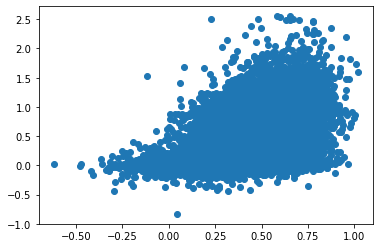

In [109]:
plt.scatter(preds, scores_arr)

In [110]:
mostNeg5 = np.argsort(regr.coef_)[0:5]
mostNeg5

array([475, 491,   5,  96,   9])

In [111]:
features_df.columns[mostNeg5]

Index(['pos_22_GC', 'pos_23_GC', 'longest T', 'pos_20_G', 'Ts'], dtype='object')

In [112]:
mostPos5 = np.argsort(regr.coef_)[-5:]
mostPos5

array([106, 499,  12, 497, 498])

In [113]:
features_df.columns[mostPos5]

Index(['pos_23_A', 'dist snd 3'', 'AG', 'dist prim 3'', 'dist prim 5''], dtype='object')

In [118]:
preds_bin = preds > 0.75
scores_bin = scores_arr > 0.75

In [121]:
np.sum(abs(preds_bin ^ scores_bin)) / len(preds_bin)

0.23559420289855074

In [126]:
fpr, tpr, thresholds = metrics.roc_curve(scores_bin, preds)

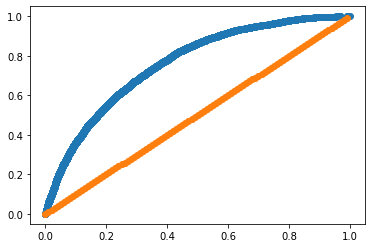

In [134]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(fpr, tpr)
ax1.scatter(np.arange(0,1,0.01), np.arange(0,1,0.01))
plt.show()

In [136]:
roc_auc_score(scores_bin, preds)

0.7613146258027335